In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [16]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


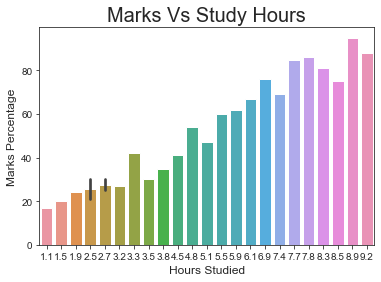

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [26]:
sns.set_style('ticks')
sns.barplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

sns.boxplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=25)
plt.ylabel('Marks in Percentage', size=20)
plt.xlabel('Study Hours', size=20)
plt.show()
print(data.corr())

In [31]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
regression = LinearRegression()
regression.fit(train_X, train_y)
print("----------Model is Trained----------")

----------Model is Trained----------


In [32]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [33]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


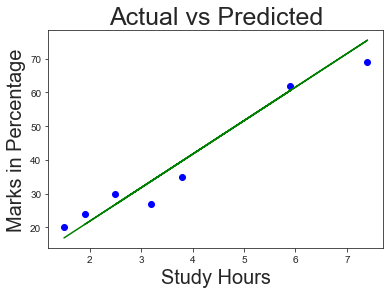

In [34]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Green')
plt.title('Actual vs Predicted', size=25)
plt.ylabel('Marks in Percentage', size=20)
plt.xlabel('Study Hours', size=20)
plt.show()

In [38]:
print('Mean_absolute_error: ',mean_absolute_error(val_y,pred_y))

Mean_absolute_error:  4.130879918502486


In [36]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],5)))

Score = 93.89273
